# Training a Food Classifier

## Load and prepare Data

Update notebook to latest version of fastai

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

Downloading the food dataset. Documentation for all datasets https://docs.fasta.ai/data.external

In [2]:
foodPath = untar_data(URLs.FOOD)

In [3]:
foodPath

Path('/root/.fastai/data/food-101')

In [4]:
get_files(foodPath)

(#101017) [Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/3078366.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1583875.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/3683936.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/711929.jpg')...]

In [5]:
get_image_files(foodPath)

(#101000) [Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/3078366.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1583875.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/3683936.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/711929.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/3355051.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/2715234.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1386125.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/119321.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1782668.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1936481.jpg')...]

<Axes: >

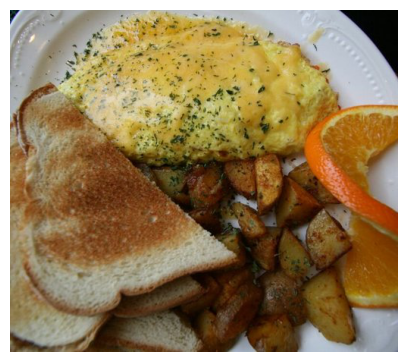

In [6]:
img = PILImage.create('/root/.fastai/data/food-101/images/omelette/3632648.jpg')
img.show()

In [7]:
#How many images are we dealing with
len(get_image_files(foodPath))

101000

In [8]:
#Use Pandas to parse the JSON as a human readable table
pd.read_json('/root/.fastai/data/food-101/test.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,churros/904526,hot_and_sour_soup/963551,samosa/917040,sashimi/889209,pork_chop/92293,spring_rolls/949343,panna_cotta/97960,beef_tartare/926143,greek_salad/949442,foie_gras/953456,...,chicken_quesadilla/921154,pho/964800,prime_rib/940800,cheesecake/970606,ice_cream/880755,omelette/955537,grilled_cheese_sandwich/942123,lobster_roll_sandwich/91688,nachos/962352,oysters/967284
246,churros/937430,hot_and_sour_soup/968546,samosa/929017,sashimi/893381,pork_chop/929555,spring_rolls/950371,panna_cotta/980326,beef_tartare/948352,greek_salad/961722,foie_gras/961263,...,chicken_quesadilla/924555,pho/965012,prime_rib/941938,cheesecake/972877,ice_cream/891533,omelette/97045,grilled_cheese_sandwich/942187,lobster_roll_sandwich/931310,nachos/98976,oysters/967288
247,churros/938480,hot_and_sour_soup/982582,samosa/937665,sashimi/938288,pork_chop/934946,spring_rolls/951951,panna_cotta/981405,beef_tartare/956509,greek_salad/968471,foie_gras/982330,...,chicken_quesadilla/9290,pho/982022,prime_rib/956130,cheesecake/996516,ice_cream/923525,omelette/978714,grilled_cheese_sandwich/975531,lobster_roll_sandwich/946365,nachos/99050,oysters/978125
248,churros/95272,hot_and_sour_soup/984258,samosa/960937,sashimi/981801,pork_chop/942955,spring_rolls/990689,panna_cotta/98261,beef_tartare/976175,greek_salad/995103,foie_gras/98353,...,chicken_quesadilla/94597,pho/990037,prime_rib/958647,cheesecake/996918,ice_cream/995145,omelette/979117,grilled_cheese_sandwich/977481,lobster_roll_sandwich/962425,nachos/99088,oysters/978925


In [9]:
#test
250*101

25250

In [10]:
#Use Pandas to parse the JSON as a human readable table
pd.read_json('/root/.fastai/data/food-101/train.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,churros/977938,hot_and_sour_soup/983606,samosa/987023,sashimi/98340,pork_chop/968836,spring_rolls/989498,panna_cotta/971492,beef_tartare/97708,greek_salad/986206,foie_gras/950701,...,chicken_quesadilla/992658,pho/969401,prime_rib/992983,cheesecake/952846,ice_cream/978261,omelette/966004,grilled_cheese_sandwich/981992,lobster_roll_sandwich/982053,nachos/99074,oysters/982030
746,churros/978170,hot_and_sour_soup/991636,samosa/989842,sashimi/987088,pork_chop/96943,spring_rolls/995483,panna_cotta/972152,beef_tartare/987587,greek_salad/994568,foie_gras/952007,...,chicken_quesadilla/993661,pho/981313,prime_rib/993496,cheesecake/958209,ice_cream/978988,omelette/968330,grilled_cheese_sandwich/986899,lobster_roll_sandwich/987229,nachos/99076,oysters/98268
747,churros/98227,hot_and_sour_soup/993036,samosa/991952,sashimi/987318,pork_chop/970362,spring_rolls/996700,panna_cotta/973687,beef_tartare/987926,greek_salad/995049,foie_gras/976580,...,chicken_quesadilla/993767,pho/988049,prime_rib/996023,cheesecake/971470,ice_cream/987631,omelette/979474,grilled_cheese_sandwich/987731,lobster_roll_sandwich/990202,nachos/99087,oysters/98313
748,churros/993534,hot_and_sour_soup/997881,samosa/992201,sashimi/993162,pork_chop/99168,spring_rolls/998226,panna_cotta/97774,beef_tartare/999120,greek_salad/99676,foie_gras/978439,...,chicken_quesadilla/997377,pho/998863,prime_rib/998348,cheesecake/983639,ice_cream/988684,omelette/981323,grilled_cheese_sandwich/997050,lobster_roll_sandwich/99754,nachos/992029,oysters/990299


In [11]:
#train
750*101

75750

In [12]:
#total
75750+25250

101000

## Deciding which two foods we want to classify

In [13]:
#Use Pandas to parse the JSON as a human readable table
list(pd.read_json('/root/.fastai/data/food-101/train.json').columns)

['churros',
 'hot_and_sour_soup',
 'samosa',
 'sashimi',
 'pork_chop',
 'spring_rolls',
 'panna_cotta',
 'beef_tartare',
 'greek_salad',
 'foie_gras',
 'tacos',
 'pad_thai',
 'poutine',
 'ramen',
 'pulled_pork_sandwich',
 'bibimbap',
 'beignets',
 'apple_pie',
 'crab_cakes',
 'risotto',
 'paella',
 'steak',
 'baby_back_ribs',
 'miso_soup',
 'frozen_yogurt',
 'club_sandwich',
 'carrot_cake',
 'falafel',
 'bread_pudding',
 'chicken_wings',
 'gnocchi',
 'caprese_salad',
 'creme_brulee',
 'escargots',
 'chocolate_cake',
 'tiramisu',
 'spaghetti_bolognese',
 'mussels',
 'scallops',
 'baklava',
 'edamame',
 'macaroni_and_cheese',
 'pancakes',
 'garlic_bread',
 'beet_salad',
 'onion_rings',
 'red_velvet_cake',
 'grilled_salmon',
 'chicken_curry',
 'deviled_eggs',
 'caesar_salad',
 'hummus',
 'fish_and_chips',
 'lasagna',
 'peking_duck',
 'guacamole',
 'strawberry_shortcake',
 'clam_chowder',
 'croque_madame',
 'french_onion_soup',
 'beef_carpaccio',
 'fried_rice',
 'donuts',
 'gyoza',
 'ravio

In [14]:
labelA = 'tiramisu'
labelB = 'chocolate_cake'

**Data preparation**


1.   Removing all the images that don't have label A or label B
2.   Renaming images with labelA or B to have that label in their filename



In [15]:
# Loop through all Images downloaded
for img in get_image_files(foodPath):
  #rename Images so that the label (tiramisu or chocolate_cake) is in the filename
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}_{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}_{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(foodPath))

2000

## Train Model

In [16]:
def GetLabel(fileName):
  return fileName.split('_')[0]

GetLabel('samosa_574547.jpg')

'samosa'

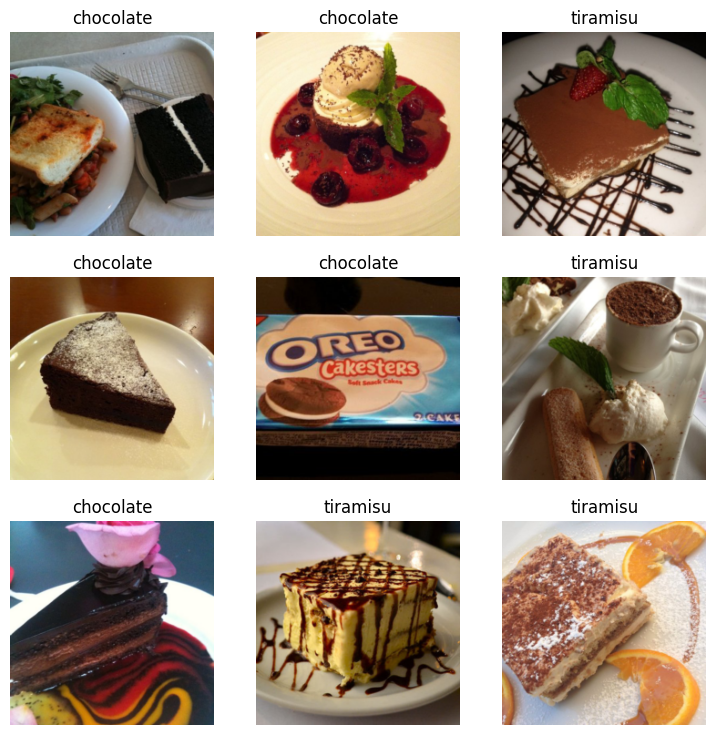

In [17]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath),valid_pct=0.2,seed=420,
    label_func=GetLabel,item_tfms=Resize(224)
)

dls.valid.show_batch()

In [18]:
learn = cnn_learner(dls,resnet34,metrics=error_rate,pretrained=True)
learn.fine_tune(epochs=10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,0.956387,0.553483,0.190000,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.471761,0.491255,0.170000,00:17
1,0.299805,0.520583,0.155000,00:19
2,0.193420,0.521973,0.135000,00:17
3,0.124991,0.583964,0.145000,00:18
4,0.085870,0.742956,0.152500,00:17
5,0.061859,0.626290,0.132500,00:17
6,0.043003,0.646178,0.117500,00:18
7,0.029199,0.629554,0.117500,00:17
8,0.020226,0.623958,0.120000,00:18
9,0.013624,0.626907,0.120000,00:17


https://distill.pub/2017/feature-visualization

## Verify Model

### Upload own images

Saving GJ7uCwGiteTF24HTWBclkziVTdhpQeZWH23MvQfq.jpeg to GJ7uCwGiteTF24HTWBclkziVTdhpQeZWH23MvQfq.jpeg


This is a chocolate.
tiramisu 0.000094
chocolate_cake 0.999906


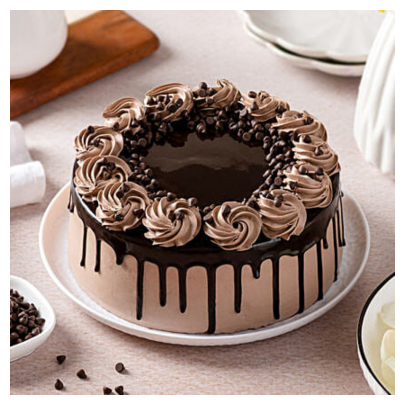

In [22]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]
img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"{labelA} {probs[1].item():.6f}")
print(f"{labelB} {probs[0].item():.6f}")

## Confusion matrix

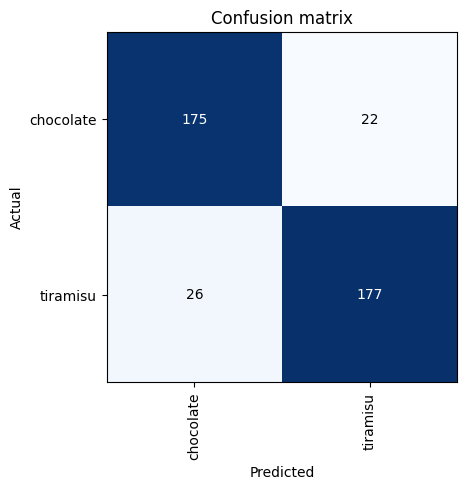

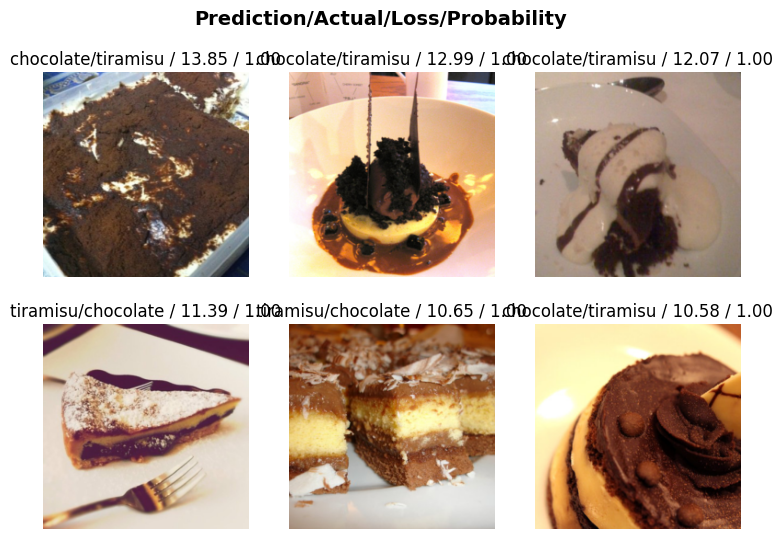

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

In [26]:
learn.export() #exports model as 'export.pkl' by default

In [27]:
#Grab the first pkl file we can find
modelPath = get_files(foodPath,'.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

In [29]:
import matplotlib.image as mpimg

In [30]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0])) #raw prediction

('chocolate', tensor(0), tensor([1.0000e+00, 7.9328e-07]))

In [31]:
learn_inf.dls.vocab #Get the labels

['chocolate', 'tiramisu']

In [32]:
from google.colab import files
files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>